In [45]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [47]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

# Exploratory Data Analysis

In [48]:
df = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [49]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

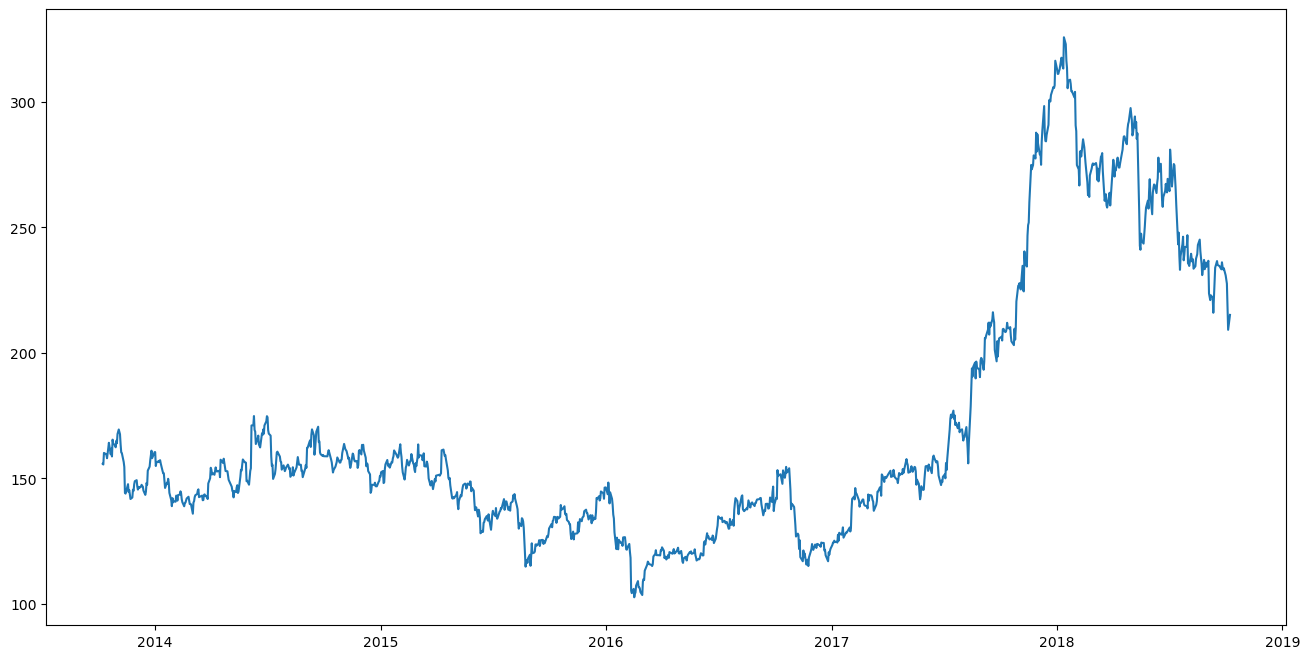

In [50]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [51]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [52]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [55]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [56]:
new_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [57]:
final_dataset

array([[Timestamp('2013-10-08 00:00:00'), 155.8],
       [Timestamp('2013-10-09 00:00:00'), 155.55],
       [Timestamp('2013-10-10 00:00:00'), 160.15],
       ...,
       [Timestamp('2018-10-04 00:00:00'), 218.2],
       [Timestamp('2018-10-05 00:00:00'), 209.2],
       [Timestamp('2018-10-08 00:00:00'), 215.15]], dtype=object)

In [58]:
final_dataset = pd.DataFrame(final_dataset)

In [59]:
final_dataset

,0,1
0,2013-10-08,155.8
1,2013-10-09,155.55
2,2013-10-10,160.15
3,2013-10-11,160.05
4,2013-10-14,159.45
...,...,...
1230,2018-10-01,230.9
1231,2018-10-03,227.6
1232,2018-10-04,218.2
1233,2018-10-05,209.2


In [60]:
final_dataset.columns = ['Timestamp', 'Closing Price']
final_dataset

,Timestamp,Closing Price
0,2013-10-08,155.8
1,2013-10-09,155.55
2,2013-10-10,160.15
3,2013-10-11,160.05
4,2013-10-14,159.45
...,...,...
1230,2018-10-01,230.9
1231,2018-10-03,227.6
1232,2018-10-04,218.2
1233,2018-10-05,209.2


In [61]:
final_dataset['Timestamp'] = final_dataset['Timestamp'].apply(pd.Timestamp.timestamp)

In [62]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset.drop(columns=['Timestamp']))

In [63]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [64]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

/Users/bharathkalyan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


927/927 - 8s - loss: 0.0012 - 8s/epoch - 9ms/step


In [65]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 0s 5ms/step


In [66]:
lstm_model.save("saved_model.keras")

/var/folders/6q/fn84x13j7f71ynxjrwfxbtwc0000gp/T/ipykernel_5079/1362658814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


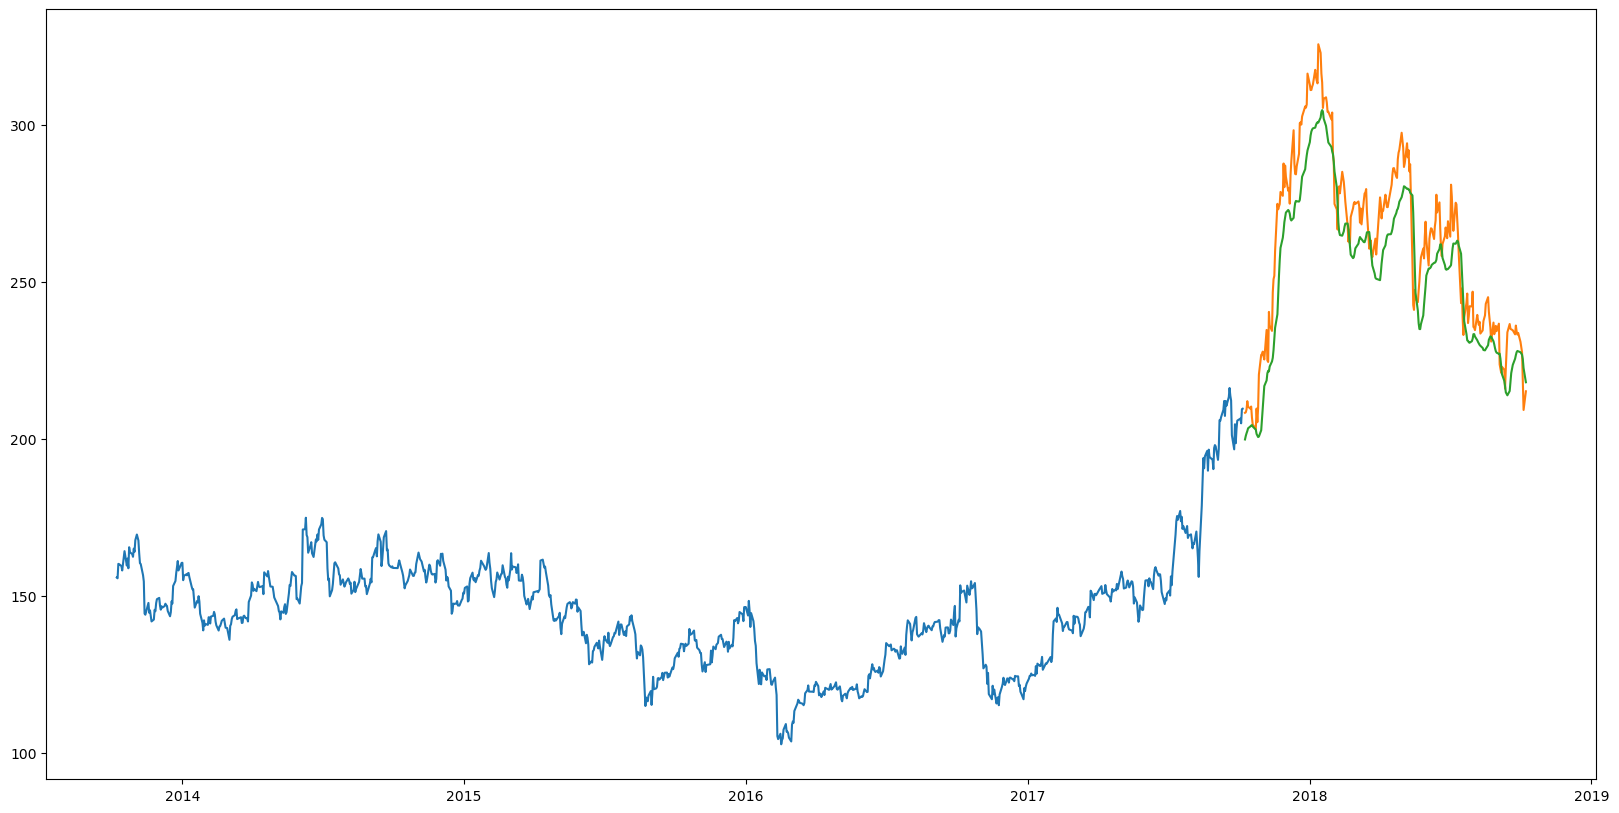

In [67]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"]);
plt.plot(valid_data[['Close',"Predictions"]]);

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Define the time step for LSTM (e.g., predict next day's closing price based on past 'n' days)
time_step = 10

# Create sequences of past closing prices and the corresponding target closing prices
X = []
y = []
for i in range(len(df) - time_step):
    X.append(df['Close'][i:i+time_step])
    y.append(df['Close'][i+time_step])

X = np.array(X)
y = np.array(y)

# Split the data into training and validation sets
split_ratio = 0.8  # Use 80% of data for training and 20% for validation
split_index = int(split_ratio * len(X))

X_train, X_valid = X[:split_index], X[split_index:]
y_train, y_valid = y[:split_index], y[split_index:]

# Reshape the input data to fit the LSTM model (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid))

# Generate predictions on the validation set
y_pred = model.predict(X_valid)

# Inverse transform the predictions to get the original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_valid_inv = scaler.inverse_transform(y_valid.reshape(-1, 1))

# Now, 'y_pred_inv' contains the predicted closing prices in the original scale
# 'y_valid_inv' contains the actual closing prices in the original scale
# You can use these to create the 'LSTM Predicted closing price' graph

Epoch 1/100
31/31 [==============================] - 2s 16ms/step - loss: 0.0284 - val_loss: 7.1905e-04
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 7.0444e-04
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 6.8596e-04
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 7.3716e-04
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 6.8998e-04
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 6.9326e-04
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 6.6926e-04
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 6.6192e-04
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 6.5892e-04
Epoch 10/100
31/31 [==============================] - 0s 4ms/step - loss

31/31 [==============================] - 0s 5ms/step - loss: 4.0207e-04 - val_loss: 2.5556e-04
Epoch 78/100
31/31 [==============================] - 0s 5ms/step - loss: 4.2370e-04 - val_loss: 3.1929e-04
Epoch 79/100
31/31 [==============================] - 0s 4ms/step - loss: 4.6404e-04 - val_loss: 2.9001e-04
Epoch 80/100
31/31 [==============================] - 0s 4ms/step - loss: 3.8321e-04 - val_loss: 2.6891e-04
Epoch 81/100
31/31 [==============================] - 0s 4ms/step - loss: 3.7316e-04 - val_loss: 2.5655e-04
Epoch 82/100
31/31 [==============================] - 0s 5ms/step - loss: 3.8345e-04 - val_loss: 2.3571e-04
Epoch 83/100
31/31 [==============================] - 0s 4ms/step - loss: 3.6583e-04 - val_loss: 2.3183e-04
Epoch 84/100
31/31 [==============================] - 0s 5ms/step - loss: 3.7397e-04 - val_loss: 2.7845e-04
Epoch 85/100
31/31 [==============================] - 0s 4ms/step - loss: 3.7451e-04 - val_loss: 3.0782e-04
Epoch 86/100
31/31 [=====================

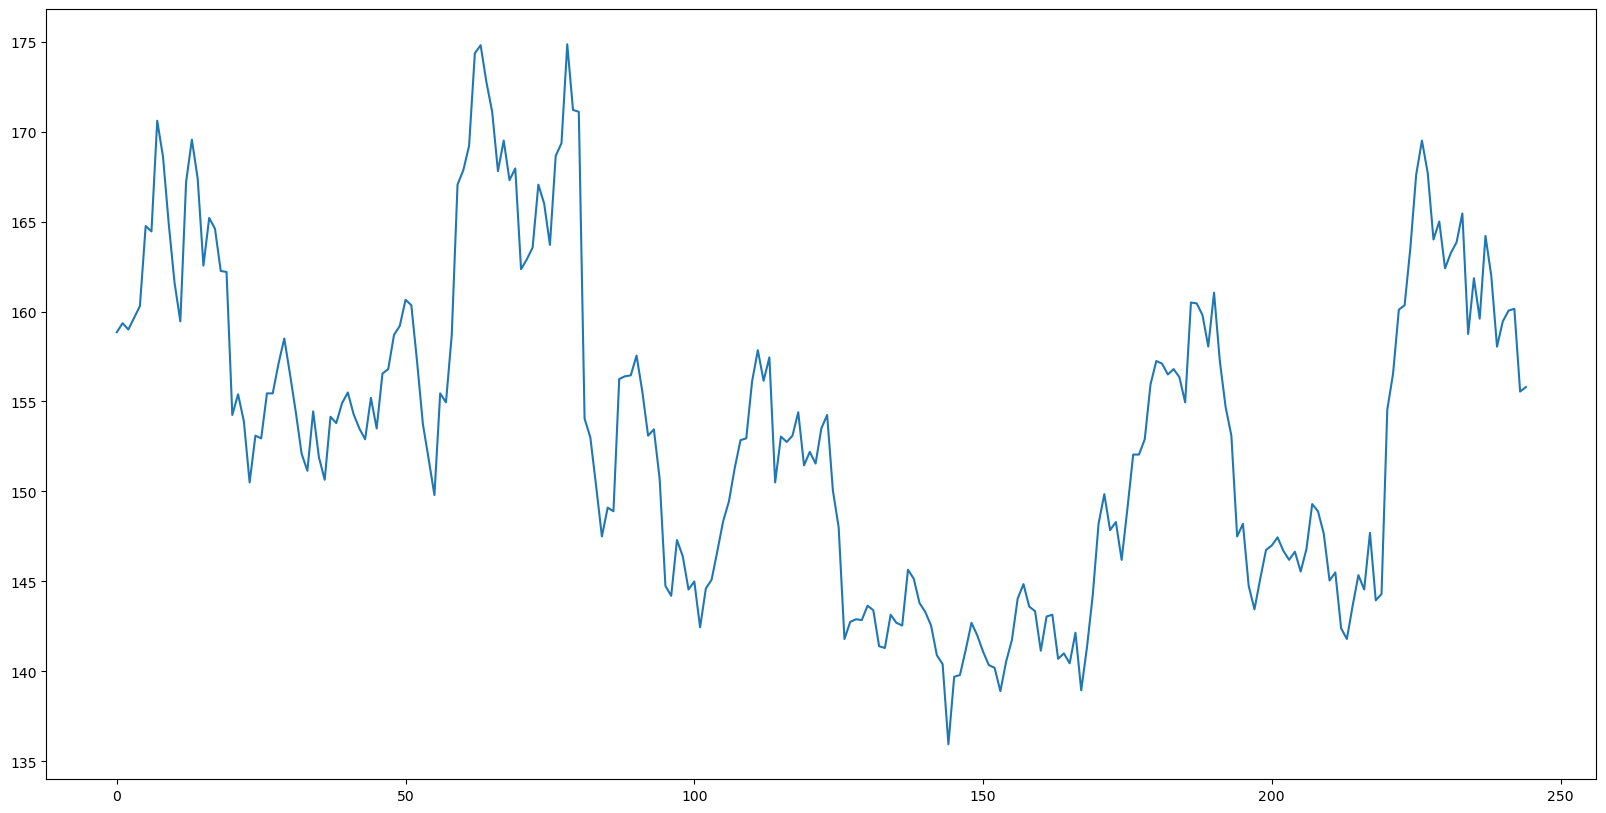

In [69]:
plt.plot(y_valid_inv)

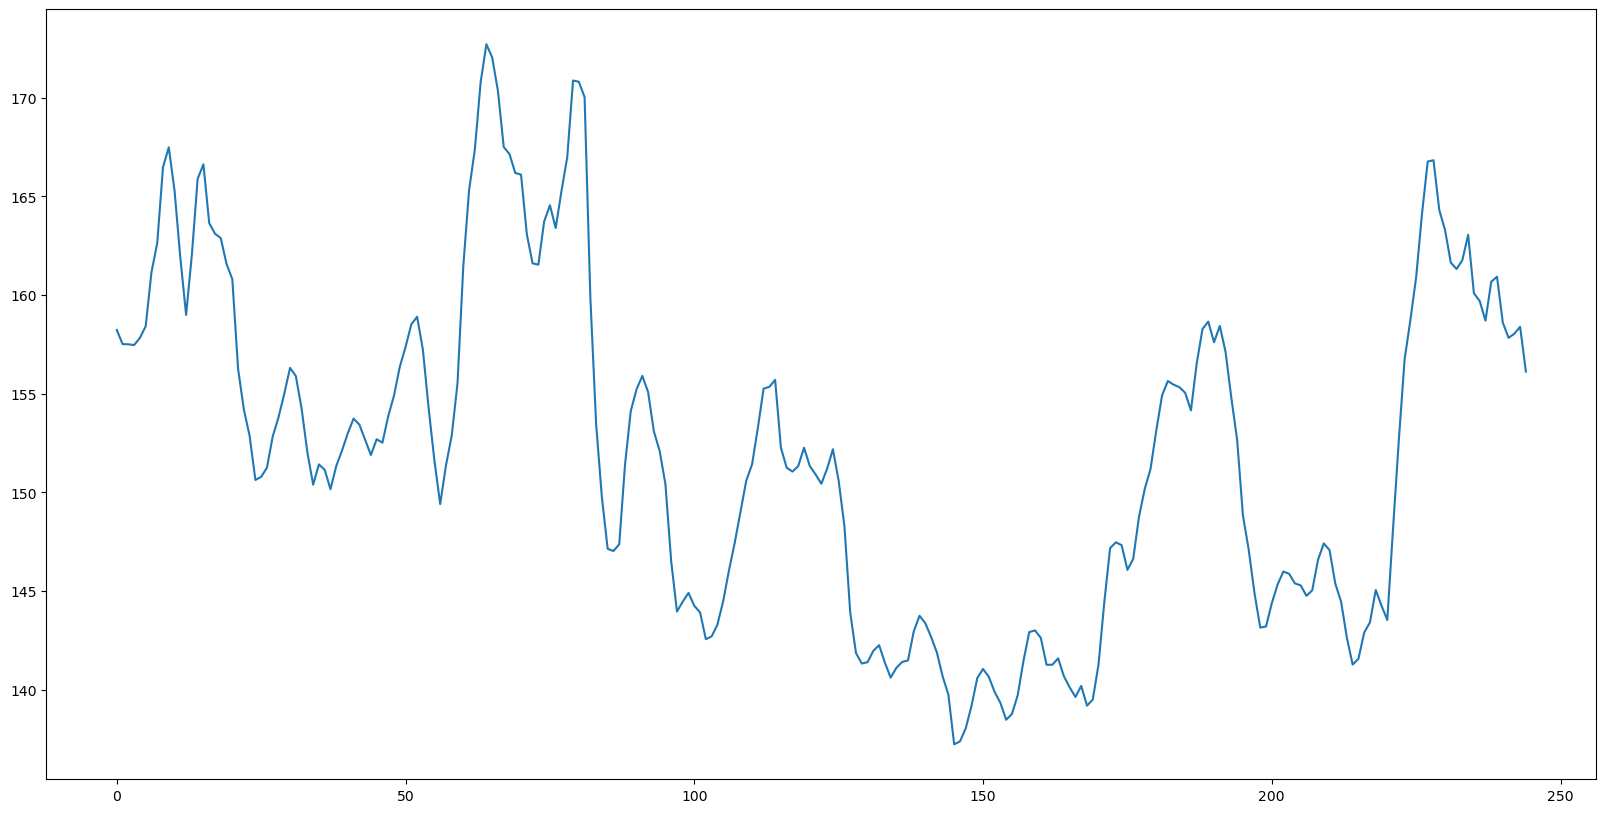

In [70]:
plt.plot(y_pred_inv)

In [34]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 696.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 808.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 857.8 kB/s eta 0:00:00a 0:00:01
